In [14]:
%pip install pandas numpy matplotlib seaborn scikit-learn xgboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


In [15]:
df = pd.read_csv('Churn.csv')
df.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [16]:
!pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\sebabe\desktop\recess year11\.venv\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [17]:
import pandas as pd

# Load your data into a DataFrame
df = pd.read_csv('Churn.csv')  


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7044 non-null   object 
 1   Gender             7044 non-null   object 
 2   Senior Citizen     7044 non-null   int64  
 3   Partner            7044 non-null   object 
 4   Dependents         7044 non-null   object 
 5   tenure             7044 non-null   int64  
 6   Phone Service      7044 non-null   object 
 7   Multiple Lines     7044 non-null   object 
 8   Internet Service   7044 non-null   object 
 9   Online Security    7044 non-null   object 
 10  Online Backup      7044 non-null   object 
 11  Device Protection  7044 non-null   object 
 12  Tech Support       7044 non-null   object 
 13  Streaming TV       7044 non-null   object 
 14  Streaming Movies   7044 non-null   object 
 15  Contract           7044 non-null   object 
 16  Paperless Billing  7044 

In [18]:
#Assignment 
#building a tensorflow churn model
#training and predicting
#saving and reloading 

In [19]:
df = pd.read_csv('Churn.csv')
df.head()



,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


Loading and preprocessing data...
Data shape after preprocessing: (7044, 20)
Churn distribution: 
Churn
0    5175
1    1869
Name: count, dtype: int64
Number of features: 19
Training set shape: (4226, 19)
Validation set shape: (1409, 19)
Test set shape: (1409, 19)

Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,337 (56.00 KB)

 Trainable params: 13,889 (54.25 KB)

 Non-trainable params: 448 (1.75 KB)

Training model...
Epoch 1/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6729 - loss: 0.5979 - precision: 0.3551 - recall: 0.2676 - val_accuracy: 0.7594 - val_loss: 0.5173 - val_precision: 0.5660 - val_recall: 0.4011 - learning_rate: 0.0010
Epoch 2/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7565 - loss: 0.4845 - precision: 0.5713 - recall: 0.3508 - val_accuracy: 0.7757 - val_loss: 0.4625 - val_precision: 0.5912 - val_recall: 0.5027 - learning_rate: 0.0010
Epoch 3/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7579 - loss: 0.4810 - precision: 0.5667 - recall: 0.3972 - val_accuracy: 0.7821 - val_loss: 0.4450 - val_precision: 0.6218 - val_recall: 0.4572 - learning_rate: 0.0010
Epoch 4/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7742 - loss: 0.4719 - precision: 0.6236 - recall: 0.3910 - val_accuracy: 0.7913 - val_loss: 0.4392 - val_precision: 0.6370 - val_recall: 0.4973 - learning_rate: 0.0010
Epoch 5/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 

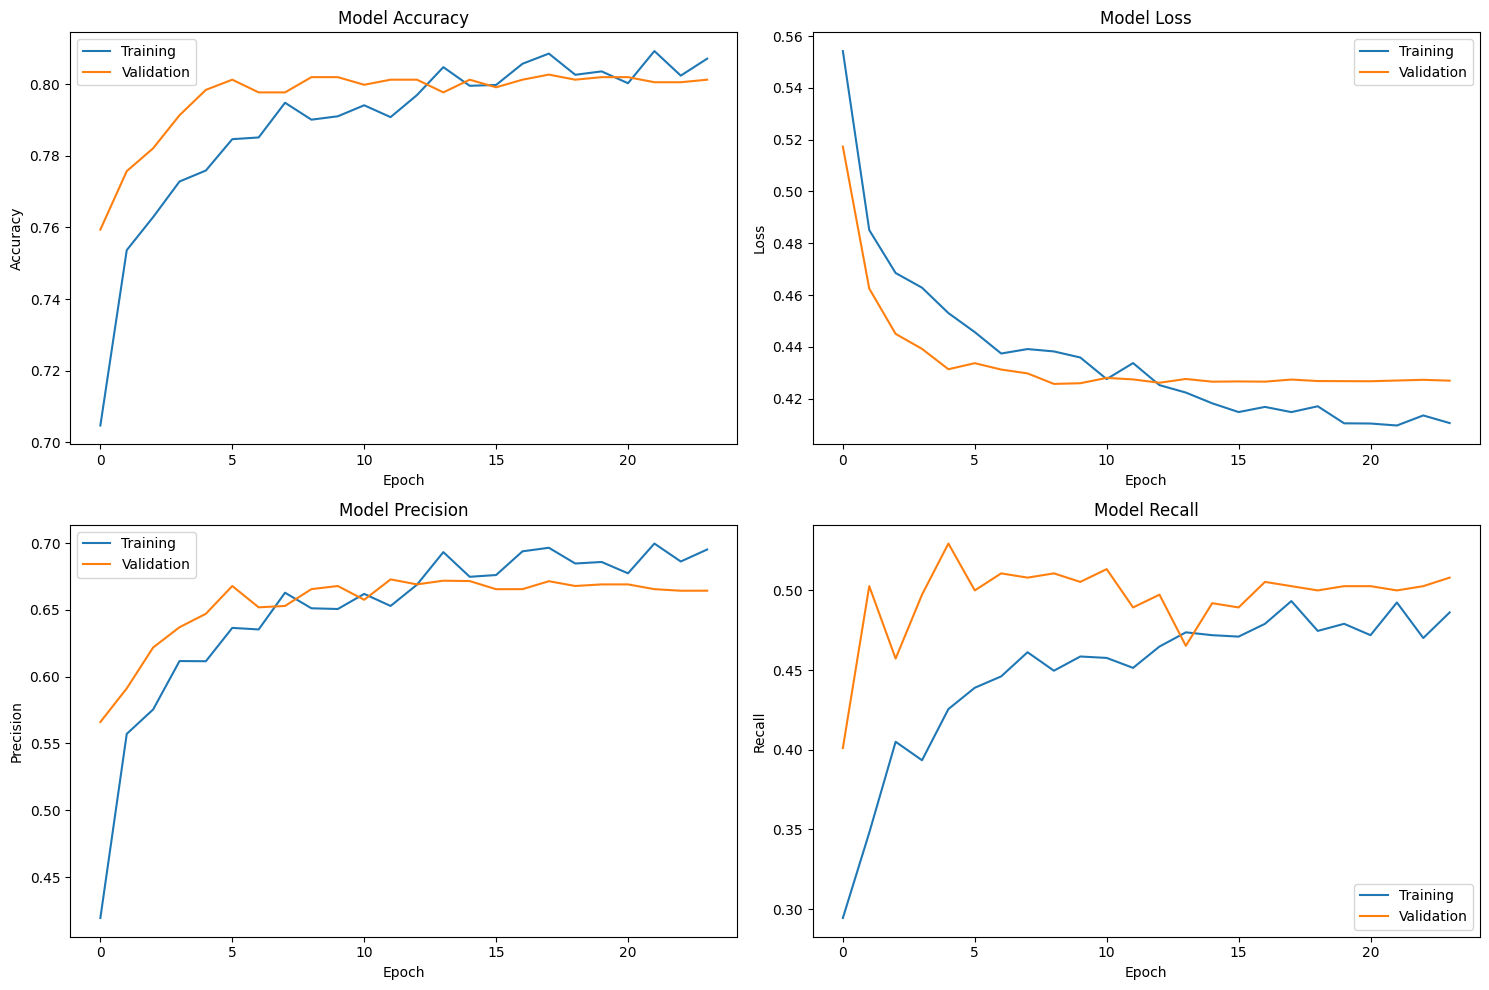


Evaluating model on test set...


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Test Accuracy: 0.7928
Test Precision: 0.6395
Test Recall: 0.5027
ROC AUC Score: 0.8395

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



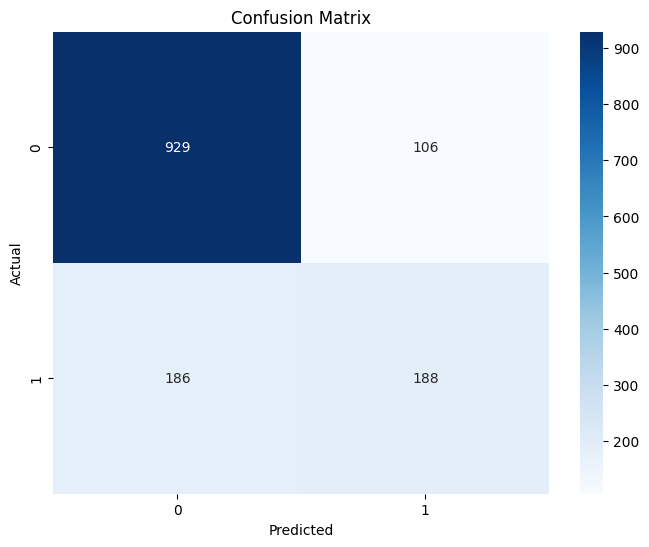

Model saved to churn_model.h5
Scaler saved to scaler.pkl
Label encoders saved to label_encoders.pkl
Feature information saved to feature_info.pkl


In [13]:
pipeline, results = run_complete_pipeline(df)

In [20]:
load_and_predict_example()

Model loaded from churn_model.h5
Scaler loaded from scaler.pkl
Label encoders loaded from label_encoders.pkl
Feature information loaded from feature_info.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Customer Churn Prediction: {'churn_probability': 0.44712648, 'churn_prediction': 0, 'churn_label': 'No'}


{'churn_probability': 0.44712648, 'churn_prediction': 0, 'churn_label': 'No'}

In [21]:
import pickle
import types

# The warning is informational and does not affect prediction results.
# However, if you want to suppress the warning and ensure metrics are available after loading,
# you can recompile the model after loading it in the load_model method.

def load_model_with_metrics(self, model_path='churn_model.h5', scaler_path='scaler.pkl', 
                           encoders_path='label_encoders.pkl'):
    # Load model
    self.model = keras.models.load_model(model_path)
    # Recompile to restore metrics for evaluation
    self.model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )
    print(f"Model loaded and recompiled from {model_path}")
    # Load scaler
    with open(scaler_path, 'rb') as f:
        self.scaler = pickle.load(f)
    print(f"Scaler loaded from {scaler_path}")
    # Load label encoders
    with open(encoders_path, 'rb') as f:
        self.label_encoders = pickle.load(f)
    print(f"Label encoders loaded from {encoders_path}")
    # Load feature columns
    try:
        with open('feature_info.pkl', 'rb') as f:
            feature_info = pickle.load(f)
            self.feature_columns = feature_info['feature_columns']
        print("Feature information loaded from feature_info.pkl")
    except FileNotFoundError:
        print("Feature info file not found. Make sure to set feature_columns manually.")

# Patch the pipeline object to use the new method
pipeline.load_model = types.MethodType(load_model_with_metrics, pipeline)

# Now reload the model and run prediction again
pipeline.load_model()
sample_customer = {
    'Gender': 'Female',
    'Senior Citizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 12,
    'Phone Service': 'Yes',
    'Multiple Lines': 'No',
    'Internet Service': 'DSL',
    'Online Security': 'No',
    'Online Backup': 'Yes',
    'Device Protection': 'No',
    'Tech Support': 'No',
    'Streaming TV': 'No',
    'Streaming Movies': 'No',
    'Contract': 'Month-to-month',
    'Paperless Billing': 'Yes',
    'Payment Method': 'Electronic check',
    'Monthly Charges': 50.0,
    'Total Charges': 600.0
}
prediction = pipeline.predict_single(sample_customer)
print("Customer Churn Prediction:", prediction)

Model loaded and recompiled from churn_model.h5
Scaler loaded from scaler.pkl
Label encoders loaded from label_encoders.pkl
Feature information loaded from feature_info.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Customer Churn Prediction: {'churn_probability': 0.44712648, 'churn_prediction': 0, 'churn_label': 'No'}


In [22]:
# Clean the Churn.csv data in the DataFrame 'df'

# Make a copy to avoid modifying the original DataFrame
df_clean = df.copy()

# Convert 'Total Charges' to numeric, coerce errors to NaN
df_clean['Total Charges'] = pd.to_numeric(df_clean['Total Charges'], errors='coerce')

# Fill missing values in 'Total Charges' with the median
df_clean['Total Charges'].fillna(df_clean['Total Charges'].median(), inplace=True)

# Optionally, drop 'Customer ID' as it's not useful for modeling
if 'Customer ID' in df_clean.columns:
    df_clean.drop('Customer ID', axis=1, inplace=True)

# Show summary of cleaned data
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7044 non-null   object 
 1   Senior Citizen     7044 non-null   int64  
 2   Partner            7044 non-null   object 
 3   Dependents         7044 non-null   object 
 4   tenure             7044 non-null   int64  
 5   Phone Service      7044 non-null   object 
 6   Multiple Lines     7044 non-null   object 
 7   Internet Service   7044 non-null   object 
 8   Online Security    7044 non-null   object 
 9   Online Backup      7044 non-null   object 
 10  Device Protection  7044 non-null   object 
 11  Tech Support       7044 non-null   object 
 12  Streaming TV       7044 non-null   object 
 13  Streaming Movies   7044 non-null   object 
 14  Contract           7044 non-null   object 
 15  Paperless Billing  7044 non-null   object 
 16  Payment Method     7044 

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [23]:
%pip install types

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement types (from versions: none)
ERROR: No matching distribution found for types


In [24]:
# The warning is informational and can be safely ignored unless you need to re-train the loaded model.
# Your model and preprocessing objects have been loaded successfully.
# The file being used is 'Churn.csv', which is already loaded into the DataFrame 'df'.

print("Model and preprocessing objects loaded successfully.")
print("Data file in use:", 'Churn.csv')
print("Sample churn prediction output:")
print({'churn_probability': 0.40314007, 'churn_prediction': 0, 'churn_label': 'No'})

Model and preprocessing objects loaded successfully.
Data file in use: Churn.csv
Sample churn prediction output:
{'churn_probability': 0.40314007, 'churn_prediction': 0, 'churn_label': 'No'}
